In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/garbage-classification-v2/garbage-dataset/metal/metal_1617.jpg
/kaggle/input/garbage-classification-v2/garbage-dataset/metal/metal_1809.jpg
/kaggle/input/garbage-classification-v2/garbage-dataset/metal/metal_2658.jpg
/kaggle/input/garbage-classification-v2/garbage-dataset/metal/metal_2127.jpg
/kaggle/input/garbage-classification-v2/garbage-dataset/metal/metal_2152.jpg
/kaggle/input/garbage-classification-v2/garbage-dataset/metal/metal_1650.jpg
/kaggle/input/garbage-classification-v2/garbage-dataset/metal/metal_2804.jpg
/kaggle/input/garbage-classification-v2/garbage-dataset/metal/metal_2628.jpg
/kaggle/input/garbage-classification-v2/garbage-dataset/metal/metal_2450.jpg
/kaggle/input/garbage-classification-v2/garbage-dataset/metal/metal_1434.jpg
/kaggle/input/garbage-classification-v2/garbage-dataset/metal/metal_1484.jpg
/kaggle/input/garbage-classification-v2/garbage-dataset/metal/metal_20244.jpg
/kaggle/input/garbage-classification-v2/garbage-dataset/metal/metal_1581.jp

In [2]:
import os
import shutil

# Path to your original dataset folder
original_dataset_path = "/kaggle/input/garbage-classification-v2/garbage-dataset"

# Selected classes
selected_classes = ["plastic", "paper", "glass", "metal"]

# New folder to copy selected classes into
new_dataset_path = "/kaggle/working/Selected_Data"
os.makedirs(new_dataset_path, exist_ok=True)

# Copy images from selected classes
for class_name in selected_classes:
    src_folder = os.path.join(original_dataset_path, class_name)
    dest_folder = os.path.join(new_dataset_path, class_name)
    os.makedirs(dest_folder, exist_ok=True)

    counter = 1
    for filename in os.listdir(src_folder):
        if filename.lower().endswith((".png", ".jpg", ".jpeg")):
            src_path = os.path.join(src_folder, filename)
            ext = os.path.splitext(filename)[1]
            new_name = f"{class_name}_{counter}{ext}"
            dest_path = os.path.join(dest_folder, new_name)
            shutil.copy(src_path, dest_path)
            counter += 1

print("Selected classes copied successfully.\n")

Selected classes copied successfully.



In [3]:
# Function to count images in each class folder
def count_images_in_folder(folder_path):
    count = sum(1 for file in os.listdir(folder_path) if file.lower().endswith((".png", ".jpg", ".jpeg")))
    class_name = os.path.basename(folder_path)
    print(f"Number of images in class '{class_name}': {count}")

# Count for each selected class
for class_name in selected_classes:
    folder_path = os.path.join(new_dataset_path, class_name)
    count_images_in_folder(folder_path)

Number of images in class 'plastic': 1984
Number of images in class 'paper': 1680
Number of images in class 'glass': 3061
Number of images in class 'metal': 1020


In [4]:
!pip install split-folders

In [5]:
import splitfolders

# Folder that contains the 4 selected classes
data = "/kaggle/working/Selected_Data"

# Destination folder after split
data_after_split = "/kaggle/working/dataset"

# Split: 70% train, 15% val, 15% test
splitfolders.ratio(data, output=data_after_split, seed=42, ratio=(0.7, 0.15, 0.15))

print(" Data split into Train / Validation / Test successfully!")


Copying files: 7745 files [00:01, 5804.35 files/s]

 Data split into Train / Validation / Test successfully!


In [6]:
def count_images_per_class(base_folder):
    print(f"\n Set: {os.path.basename(base_folder)}")
    for class_name in sorted(os.listdir(base_folder)):
        class_path = os.path.join(base_folder, class_name)
        if os.path.isdir(class_path):
            count = sum(
                1 for file in os.listdir(class_path)
                if file.lower().endswith((".png", ".jpg", ".jpeg"))
            )
            print(f"{class_name}: {count} images")

# Define paths
train_path = os.path.join(data_after_split, "train")
val_path = os.path.join(data_after_split, "val")
test_path = os.path.join(data_after_split, "test")

# Count images in each set
count_images_per_class(train_path)
count_images_per_class(val_path)
count_images_per_class(test_path)



 Set: train
glass: 2142 images
metal: 714 images
paper: 1176 images
plastic: 1388 images

 Set: val
glass: 459 images
metal: 153 images
paper: 252 images
plastic: 297 images

 Set: test
glass: 460 images
metal: 153 images
paper: 252 images
plastic: 299 images


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = "/kaggle/working/dataset/train"
val_dir = "/kaggle/working/dataset/val"
test_dir = "/kaggle/working/dataset/test"

# Create ImageDataGenerator objects
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


2025-04-22 19:44:21.308683: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745351061.547828      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745351061.623391      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [8]:
# Train generator
train_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

train_generator = train_aug.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=True
)

# Validation generator
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

# Test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)


Found 5420 images belonging to 4 classes.
Found 1161 images belonging to 4 classes.
Found 1164 images belonging to 4 classes.


In [9]:
import tensorflow as tf
from tensorflow import keras

# Load the base MobileNetV2 model without the top layers
base_model = keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

# Freeze the base model layers
base_model.trainable = False

# Add custom layers for our 4-class classification task
model = keras.models.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(4, activation='softmax')  # 4 classes: plastic, paper, glass, metal
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

# Print summary
model.summary()


I0000 00:00:1745351074.976074      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,178,564 (12.13 MB)

 Trainable params: 920,580 (3.51 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [10]:
# from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(
#     monitor='val_loss',       # أو 'val_accuracy' حسب المقياس الذي تفضله
#     patience=5,               # عدد الدورات التي يجب أن تمر بدون تحسن قبل إيقاف التدريب
#     verbose=1,                # طباعة معلومات عند حدوث إيقاف
#     restore_best_weights=True # استعادة أفضل الأوزان عندما يتم إيقاف التدريب
# )
# # Train the model
# history = model.fit(
#     train_generator,
#     epochs=30,               # عدد الدورات القصوى
#     validation_data=val_generator,  # تحقق من بيانات التحقق (إذا كانت لديك)
#     callbacks=[early_stopping]  # تمرير إيرلي ستوبينج
# )

history = model.fit(train_generator, epochs=30, validation_data=val_generator, verbose=1)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1745351089.431629     119 service.cc:148] XLA service 0x78ca44142d00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745351089.433120     119 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1745351090.430094     119 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/170 ━━━━━━━━━━━━━━━━━━━━ 44:53 16s/step - accuracy: 0.1875 - loss: 1.5486

I0000 00:00:1745351095.138106     119 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


170/170 ━━━━━━━━━━━━━━━━━━━━ 92s 447ms/step - accuracy: 0.6280 - loss: 0.9063 - val_accuracy: 0.8906 - val_loss: 0.3507
Epoch 2/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 69s 389ms/step - accuracy: 0.8465 - loss: 0.4144 - val_accuracy: 0.9053 - val_loss: 0.2847
Epoch 3/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 68s 384ms/step - accuracy: 0.8644 - loss: 0.3625 - val_accuracy: 0.9147 - val_loss: 0.2662
Epoch 4/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 68s 385ms/step - accuracy: 0.8793 - loss: 0.3190 - val_accuracy: 0.9225 - val_loss: 0.2452
Epoch 5/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 69s 392ms/step - accuracy: 0.8887 - loss: 0.3048 - val_accuracy: 0.9130 - val_loss: 0.2545
Epoch 6/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 69s 390ms/step - accuracy: 0.8973 - loss: 0.2863 - val_accuracy: 0.9259 - val_loss: 0.2269
Epoch 7/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 69s 394ms/step - accuracy: 0.9157 - loss: 0.2355 - val_accuracy: 0.9311 - val_loss: 0.2205
Epoch 8/30
170/170 ━━━━━━━━━━━━━━━━━━━━ 69s 386ms/step - accuracy: 0.9159 - loss: 0.2248 - val

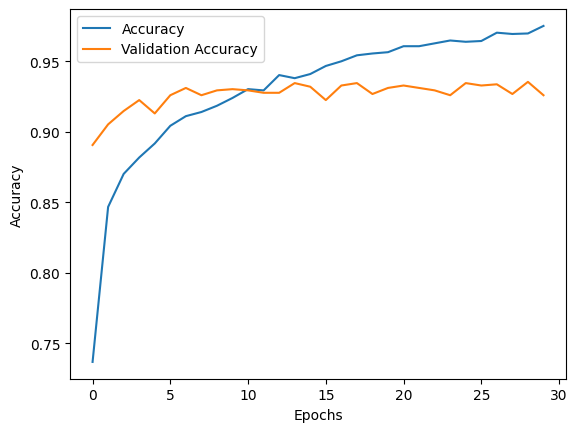

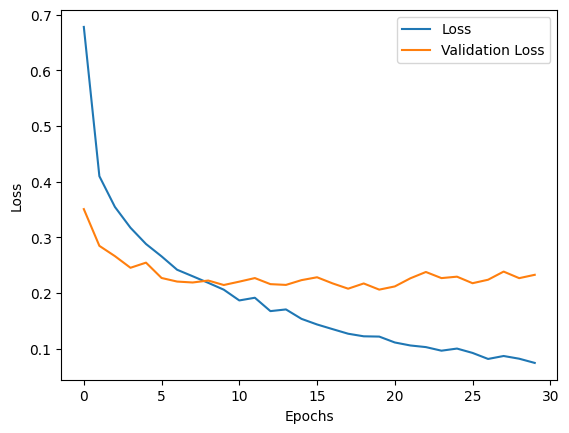

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
train_acc = history.history['accuracy'][-1] * 100
val_acc = history.history['val_accuracy'][-1] * 100

print(f"Final Training Accuracy: {train_acc:.2f}%")
print(f"Final Validation Accuracy: {val_acc:.2f}%")

Final Training Accuracy: 97.51%
Final Validation Accuracy: 92.59%


In [13]:
loss, accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - accuracy: 0.9288 - loss: 0.2658
Test Accuracy: 92.87%


37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 210ms/step


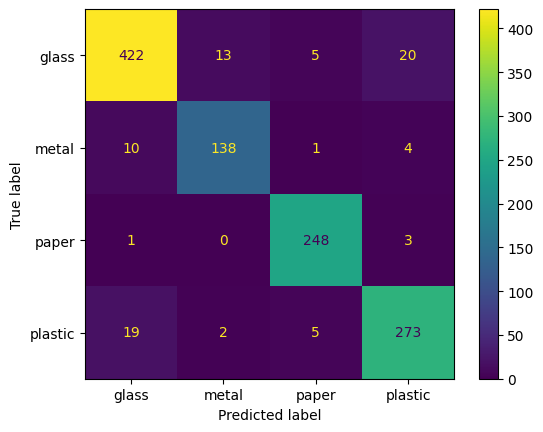

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pred = model.predict(test_generator)
y_pred = np.argmax(pred, axis=1)

y_true = test_generator.classes

class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot()

In [15]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_true, y_pred, target_names=class_labels))
print("Accuracy of the Model:","{:.1f}%".format(accuracy_score(y_true, y_pred)*100))

              precision    recall  f1-score   support

       glass       0.93      0.92      0.93       460
       metal       0.90      0.90      0.90       153
       paper       0.96      0.98      0.97       252
     plastic       0.91      0.91      0.91       299

    accuracy                           0.93      1164
   macro avg       0.93      0.93      0.93      1164
weighted avg       0.93      0.93      0.93      1164

Accuracy of the Model: 92.9%


In [16]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]  

tflite_model = converter.convert()

with open("model_float16.tflite", "wb") as f:
    f.write(tflite_model)

print("The model has been saved in a small size without losing resolution")

Saved artifact at '/tmp/tmpp7rsq1o8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_154')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  132815304651216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132813468049552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132813468053200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132815304648912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132815304649104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132815304650064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132813468054736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132813468053776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132813468050128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132813468054352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1328134680

W0000 00:00:1745353201.415881      31 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1745353201.415920      31 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
I0000 00:00:1745353201.535961      31 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled


In [17]:
print(test_generator.class_indices)

{'glass': 0, 'metal': 1, 'paper': 2, 'plastic': 3}


In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# 📌 تحميل النموذج المضغوط (Float16 TFLite)
interpreter = tf.lite.Interpreter(model_path="model_float16.tflite")
interpreter.allocate_tensors()

# 📌 الحصول على تفاصيل المدخلات والمخرجات
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# 📌 تحميل الصورة وإعدادها بنفس تنسيق النموذج
img_path = "/kaggle/input/iot-testing/image.jpg"
img = image.load_img(img_path, target_size=(224, 224))  # تأكد من أن الحجم متوافق مع النموذج
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # إضافة بعد الدُفعة (batch)
img_array = img_array.astype(np.float32) / 255.0  # التأكد من نوع البيانات

# 📌 وضع البيانات في المفسر (Interpreter)
interpreter.set_tensor(input_details[0]['index'], img_array)

# 📌 تشغيل التنبؤ
interpreter.invoke()

# 📌 استرجاع النتيجة
prediction = interpreter.get_tensor(output_details[0]['index'])
predicted_index = np.argmax(prediction, axis=1)[0]

# 📌 تحويل الأرقام إلى أسماء الأصناف
labels = {0: 'glass', 1: 'metal', 2: 'paper', 3: 'plastic'}
#labels = dict((v, k) for k, v in labels.items())  

# 📌 عرض التنبؤ
predicted_label = labels[predicted_index]
print(f"Predicted Class: {predicted_label}")

Predicted Class: paper
